In [ ]:
library(dplyr)
library(patchwork)
library(Seurat)
library(Matrix)
library(harmony)
library(stringr)
library(SingleCellExperiment)

In [ ]:
tSNE_with_harmony <- function(data.integrated,resolution=0.8, npcs=50,perplexity=30){
    library(harmony)
    data.integrated <- RunPCA(data.integrated, npcs=npcs ,verbose = FALSE,perplexity=perplexity)
    data.integrated <- RunHarmony(data.integrated, group.by.vars = 'orig.ident', verbose = FALSE,plot_convergence = FALSE)
    data.integrated <- RunTSNE(data.integrated, nthreads= 4, max_iter=2000,reduction = 'harmony')
    #data.integrated <- RunUMAP(data.integrated, dims = 1:30, verbose = FALSE, umap.method = 'umap-learn', metric = 'correlation')
    data.integrated <- FindNeighbors(data.integrated, dims = 1:npcs, verbose = FALSE,reduction = 'harmony')
    data.integrated <- FindClusters(data.integrated, resolution=resolution, verbose = FALSE)
    return (data.integrated)
}

### load the unclustered data

In [ ]:
epi <- readRDS('./data_1_1_seurat_epi.rds')

In [101]:
epi <- tSNE_with_harmony(epi, resolution=0.7)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


In [ ]:
epi <- RunUMAP(epi,reduction = 'harmony', dims = 1:40)

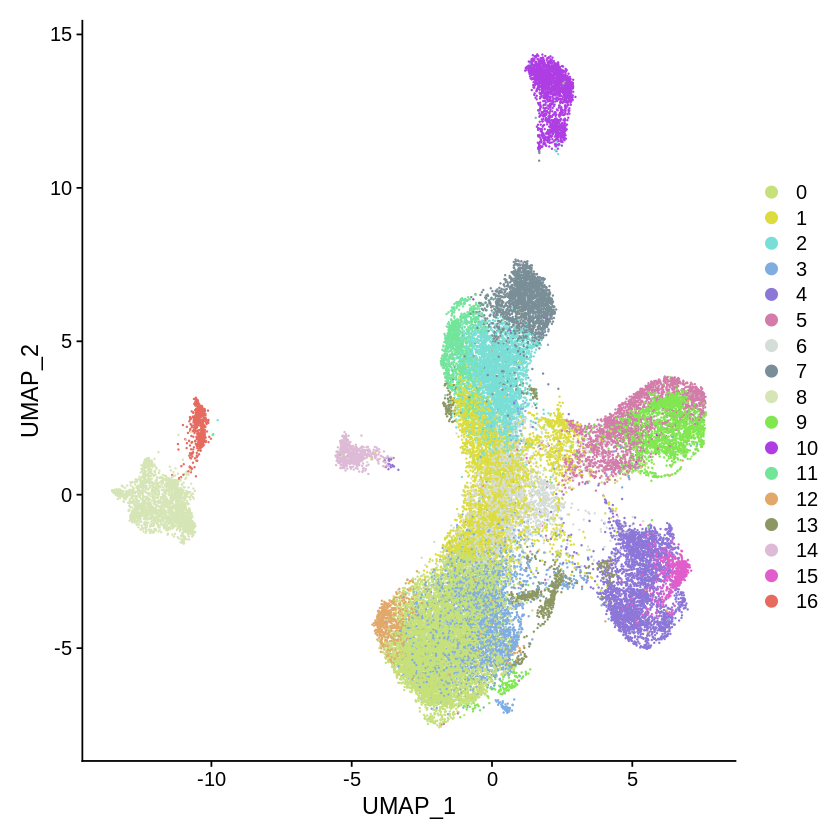

In [107]:
options(repr.plot.width=7, repr.plot.height=7)
DimPlot(epi2,group.by='seurat_clusters')

### calculate the marker genes

In [ ]:
# If you run the following command, 
# you should hide the message of this command
# too many output sentences and jupyter will be freezed
markers <- FindAllMarkers(epi, only.pos = TRUE,
                    min.pct = 0.10,
                    logfc.threshold = 0.25,
                    test.use="MAST",
                    latent.vars="nFeature_RNA")

In [1]:
write.csv(markers,'/home/tsubosaka/integrated_data/論文用再検討/修正/data_2_1_epi_markers_2.csv')

ERROR: Error in is.data.frame(x): object 'markers' not found


### If you obtain the cluster of nonepithelial cells, you should remove it

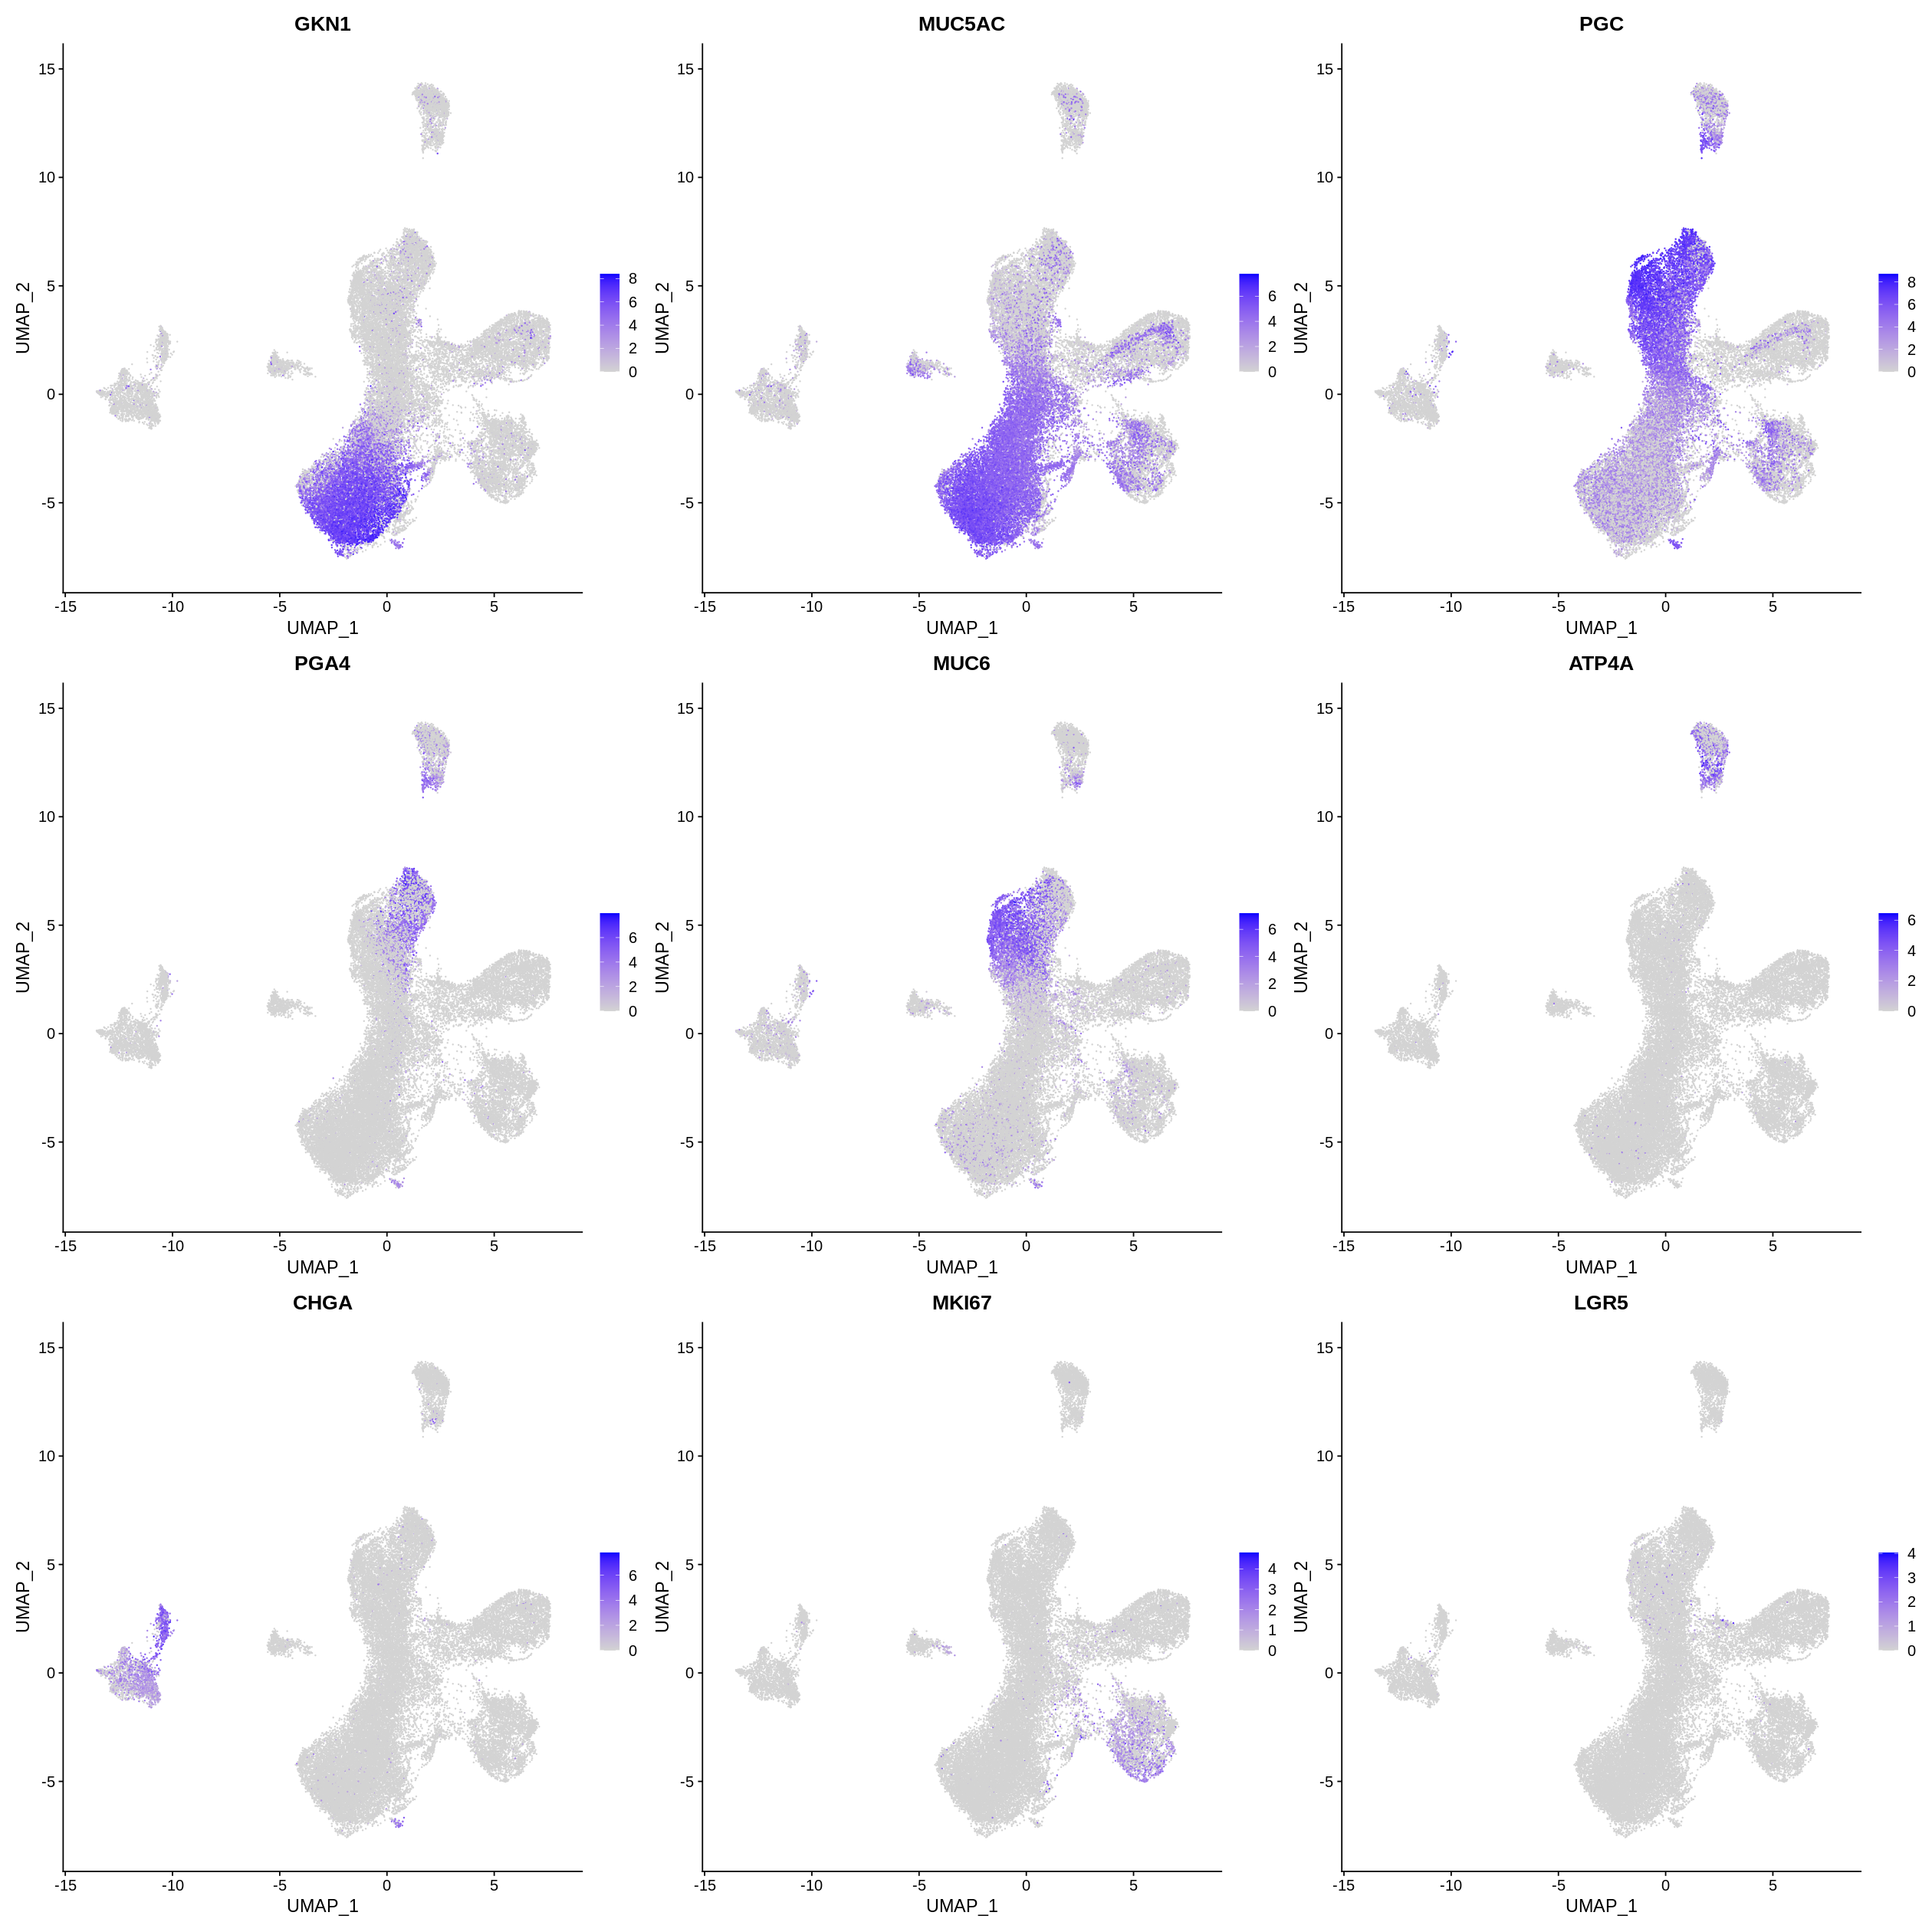

In [109]:
options(repr.plot.width=21, repr.plot.height=21)
FeaturePlot(epi2,features=c('GKN1','MUC5AC','PGC','PGA4','MUC6','ATP4A','CHGA','MKI67','LGR5'))

In [132]:
for (i in unique(markers$cluster)){

print(markers %>% filter(cluster==i) %>%top_n(50, avg_logFC))
    
print(' ')
print(' ')
print(' ')
}

           X         p_val avg_logFC pct.1 pct.2     p_val_adj cluster
1       GKN1  0.000000e+00 2.4190076 0.930 0.189  0.000000e+00       0
2       GKN2  0.000000e+00 2.0486076 0.940 0.243  0.000000e+00       0
3     PSAPL1  0.000000e+00 2.0469664 0.433 0.044  0.000000e+00       0
4     MUC5AC  0.000000e+00 1.8048715 0.982 0.437  0.000000e+00       0
5      MUCL3  0.000000e+00 1.7625217 0.715 0.182  0.000000e+00       0
6       TFF1  0.000000e+00 1.6281041 0.995 0.492  0.000000e+00       0
7       MUC1  0.000000e+00 1.6192087 0.930 0.565  0.000000e+00       0
8      DUOX2  0.000000e+00 1.5831601 0.198 0.034  0.000000e+00       0
9     SLC5A5  0.000000e+00 1.5433465 0.242 0.014  0.000000e+00       0
10   CEACAM5  0.000000e+00 1.5425937 0.310 0.057  0.000000e+00       0
11      PSCA  0.000000e+00 1.4821269 0.843 0.386  0.000000e+00       0
12     CAPN8  0.000000e+00 1.3184817 0.475 0.236  0.000000e+00       0
13       GSN  0.000000e+00 1.3175458 0.579 0.277  0.000000e+00       0
14    